In [27]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os import listdir
from os.path import isfile, join

In [28]:
experiments = [x[0] for x in os.walk(".") if 'experiment' in x[0]]

In [48]:
def cdf(data, title):

    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins, density=False)

    counts=counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)

    # Plot the cdf
    plt.plot(bin_edges[0:-1], cdf)
    plt.ylim((0,1))
    plt.xlabel("Seconds")
    plt.ylabel("CDF")
    plt.title(title)
    plt.grid(True)

    plt.show()

.\experiment_long10nodes
172.31.16.46_3000_1592018855.3999689.json
0.09809680685164436


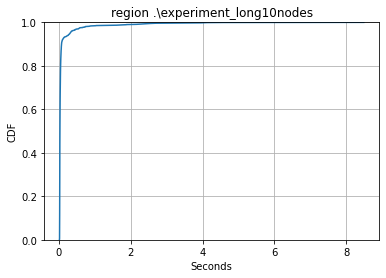

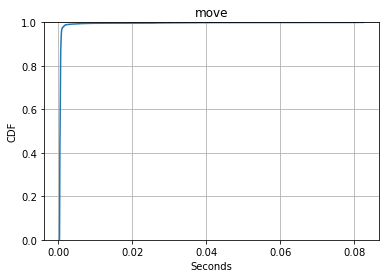

.\experiment_long10nodes
172.31.18.216_3000_1592018855.4100847.json
0.09500182157455749


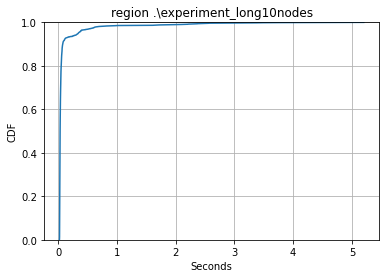

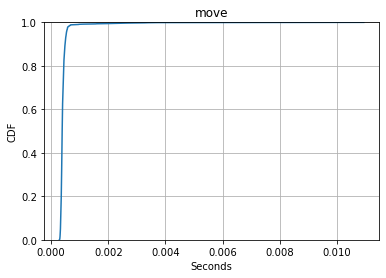

.\experiment_long10nodes
172.31.21.216_3000_1592018855.4163816.json
0.0509869153219736


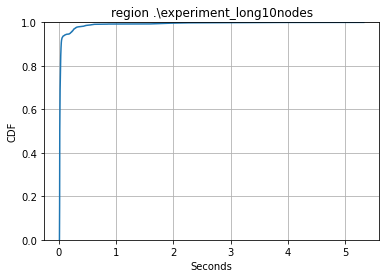

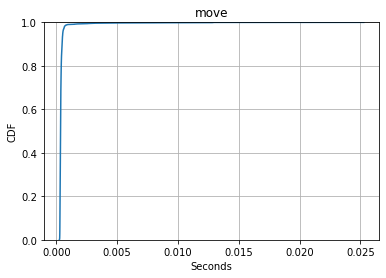

.\experiment_long10nodes
172.31.22.246_3000_1592018855.4375434.json
0.04914144876662874


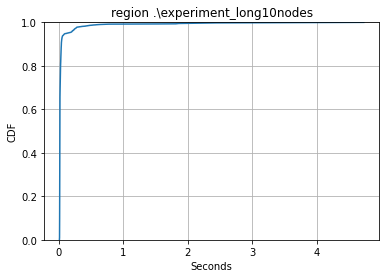

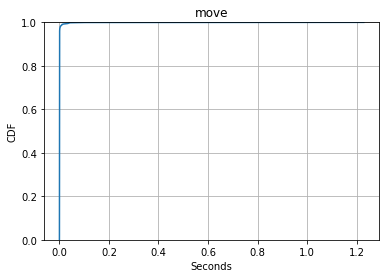

.\experiment_long10nodes
172.31.22.254_3000_1592018855.4196153.json
0.06002682748290859


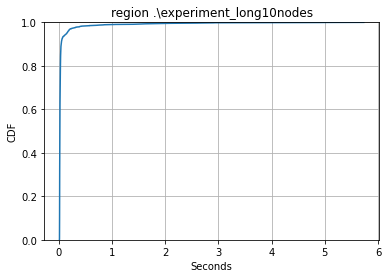

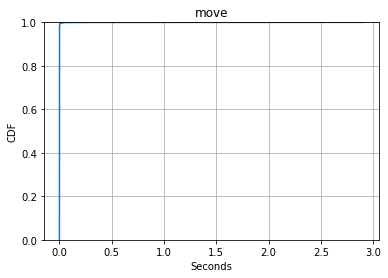

.\experiment_long10nodes
172.31.22.25_3000_1592018855.5525062.json
0.056633121924656284


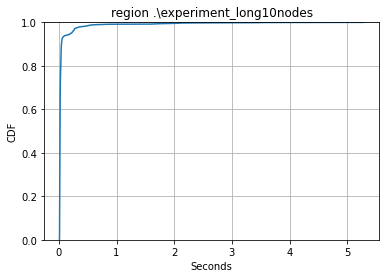

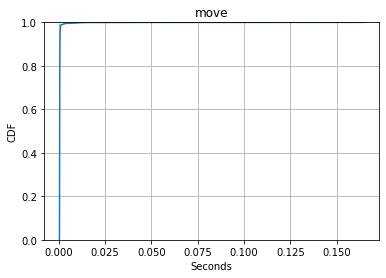

.\experiment_long10nodes
172.31.28.115_3000_1592018855.4624884.json
0.057059779330734216


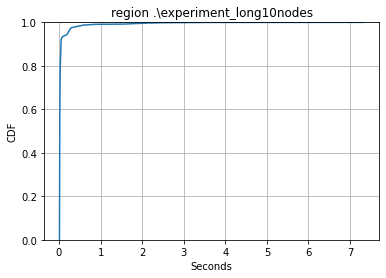

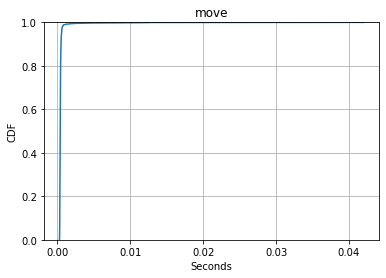

.\experiment_long10nodes
172.31.28.175_3000_1592018855.5503626.json
0.047385132901593095


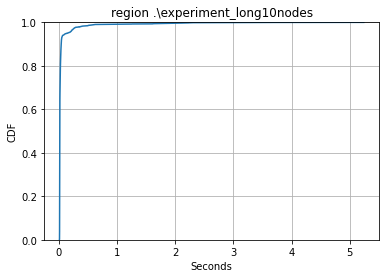

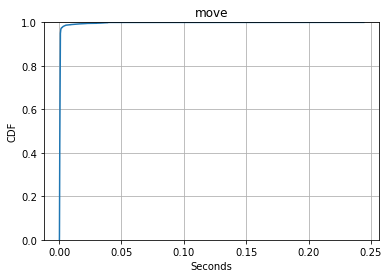

.\experiment_long10nodes
172.31.30.173_3000_1592018855.7480896.json
0.053238285683614835


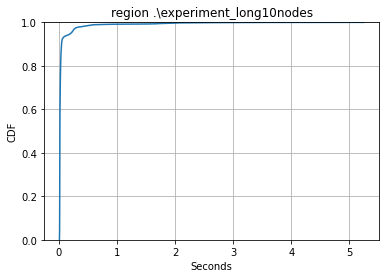

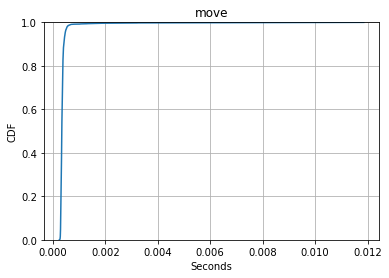

.\experiment_long10nodes
172.31.31.2_3000_1592018855.4923537.json
0.057629046834836176


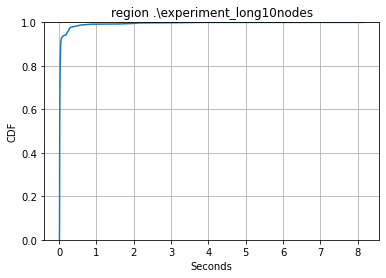

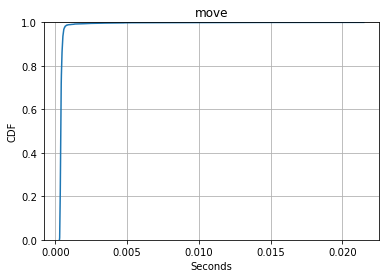

.\experiment_long30nodes
172.31.16.197_3000_1592021054.954475.json
0.09972274141161853


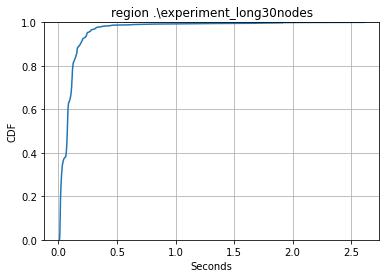

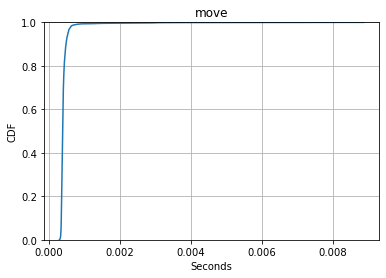

.\experiment_long30nodes
172.31.16.254_3000_1592021054.9594579.json
0.10267944526260854


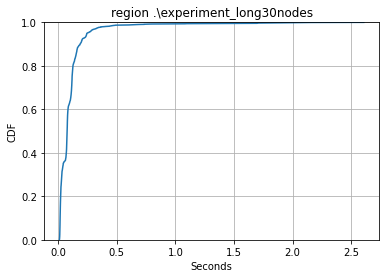

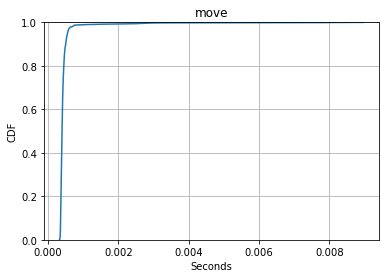

.\experiment_long30nodes
172.31.17.59_3000_1592021054.9617732.json
0.10150525018350402


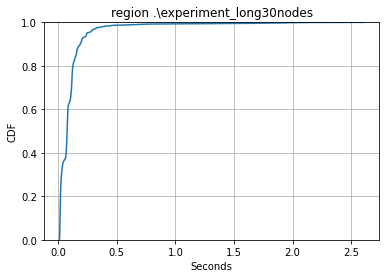

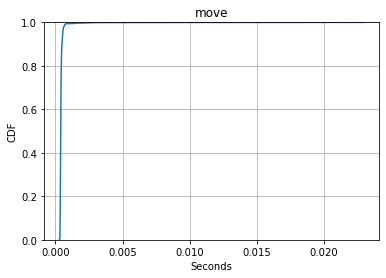

.\experiment_long30nodes
172.31.17.65_3000_1592021054.9668758.json
0.12952407414591346


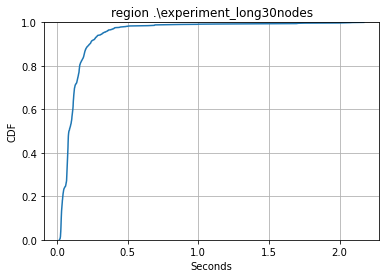

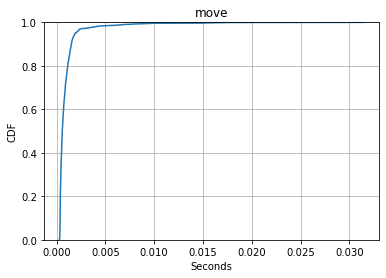

.\experiment_long30nodes
172.31.18.216_3000_1592021077.7263925.json
0.18024801191546014


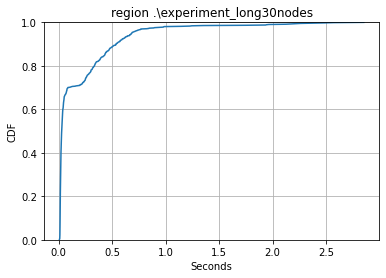

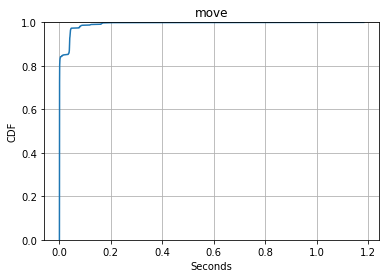

.\experiment_long30nodes
172.31.18.47_3000_1592021055.1993356.json
0.10064538231602421


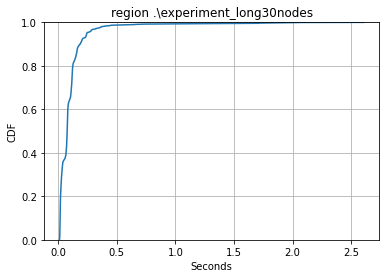

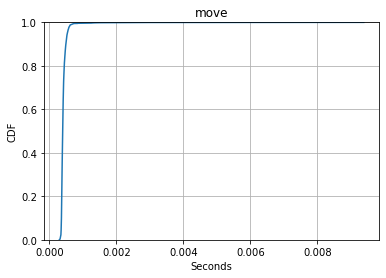

.\experiment_long30nodes
172.31.18.89_3000_1592021054.9720237.json
0.10307481073339242


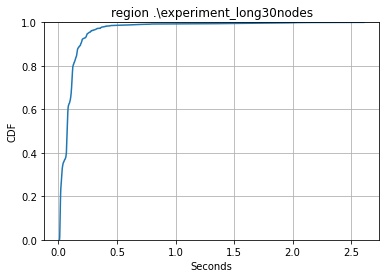

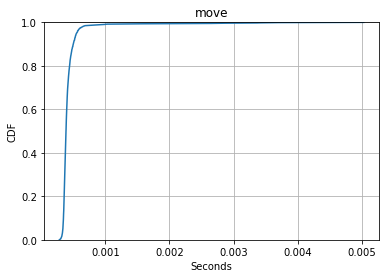

.\experiment_long30nodes
172.31.20.119_3000_1592021055.193191.json
0.09957760528744203


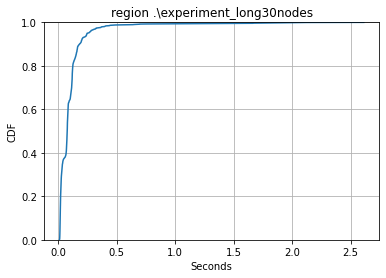

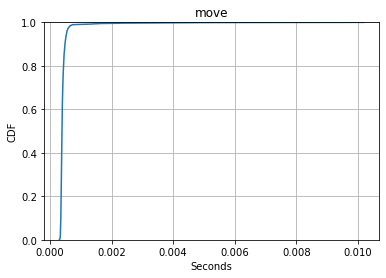

.\experiment_long30nodes
172.31.20.152_3000_1592021054.940125.json
0.09943411045223864


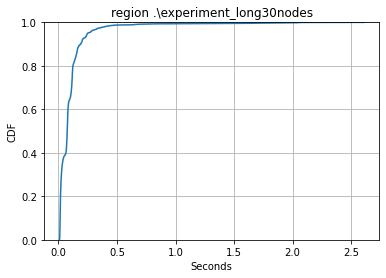

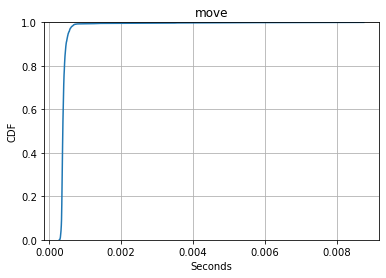

.\experiment_long30nodes
172.31.20.166_3000_1592021055.0557926.json
0.10051223848885686


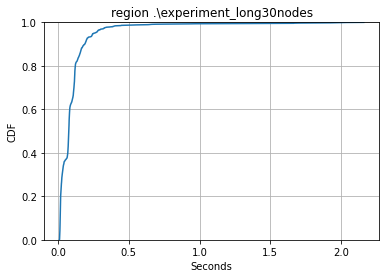

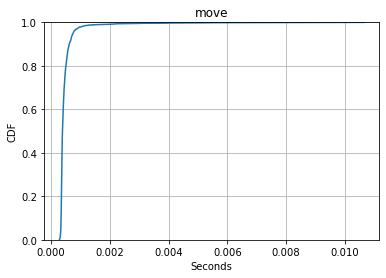

.\experiment_long30nodes
172.31.20.75_3000_1592021055.1966875.json
0.10164086594060862


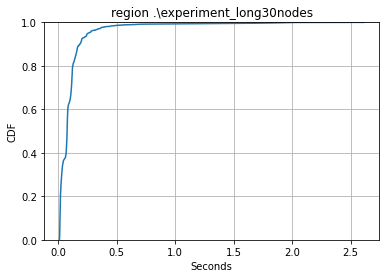

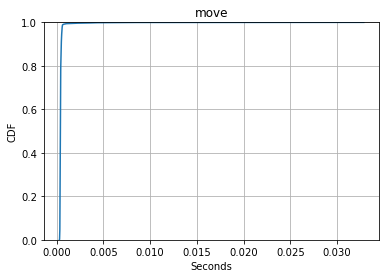

.\experiment_long30nodes
172.31.20.89_3000_1592021054.9650126.json
0.09981182297216529


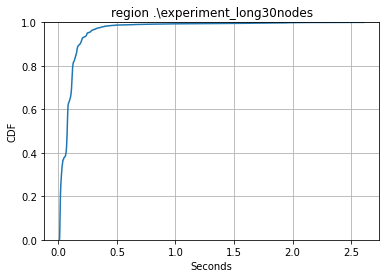

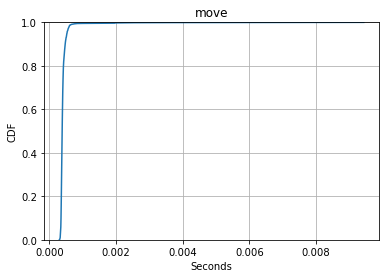

.\experiment_long30nodes
172.31.22.103_3000_1592021054.9462762.json
0.10413688961324424


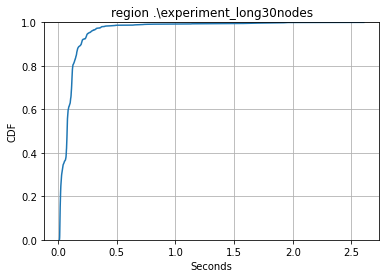

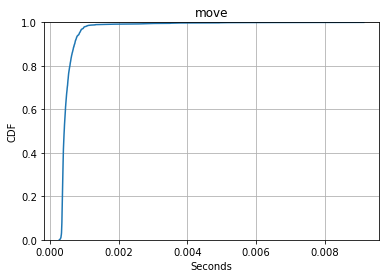

.\experiment_long30nodes
172.31.22.208_3000_1592021067.0688066.json
0.10918009644646635


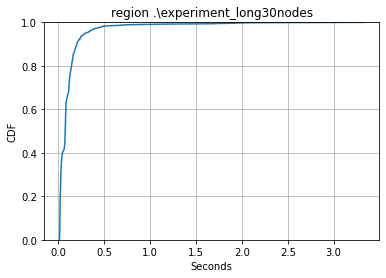

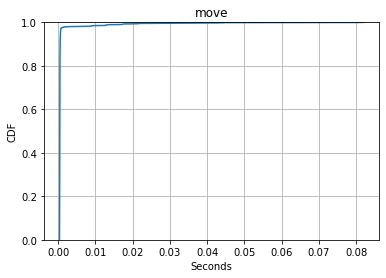

.\experiment_long30nodes
172.31.22.250_3000_1592021054.9420953.json
0.10241527163441701


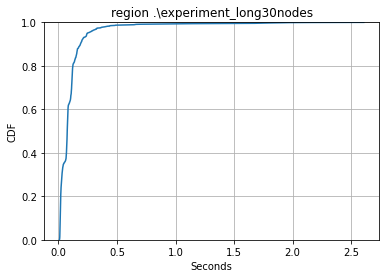

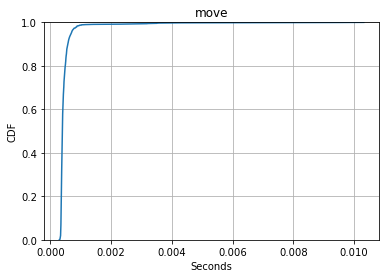

.\experiment_long30nodes
172.31.22.254_3000_1592021054.9518728.json
0.10090630930864204


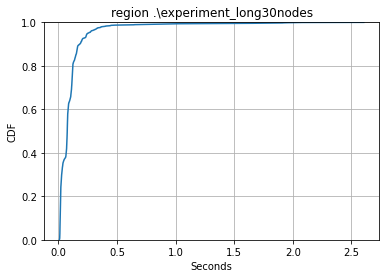

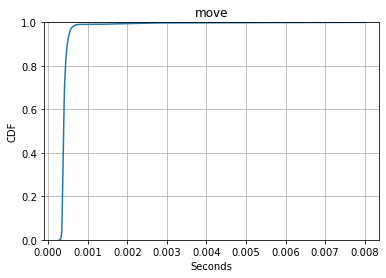

.\experiment_long30nodes
172.31.22.25_3000_1592021054.9578435.json
0.1005593284996065


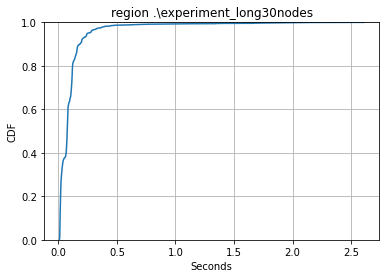

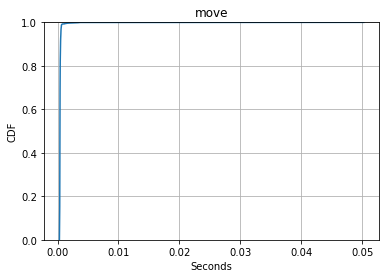

.\experiment_long30nodes
172.31.23.14_3000_1592021054.9457157.json
0.10964174395383791


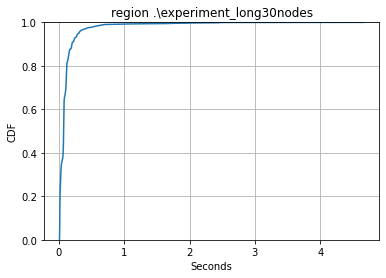

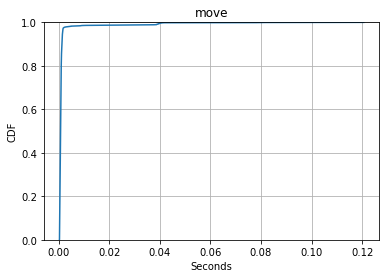

.\experiment_long30nodes
172.31.23.83_3000_1592021067.0521364.json
0.12588113637056259


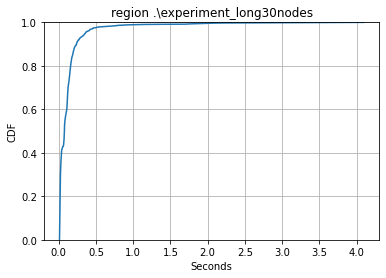

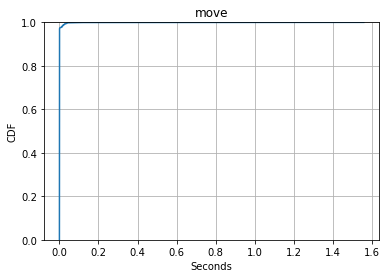

.\experiment_long30nodes
172.31.24.127_3000_1592021055.2218616.json
0.09753060634319599


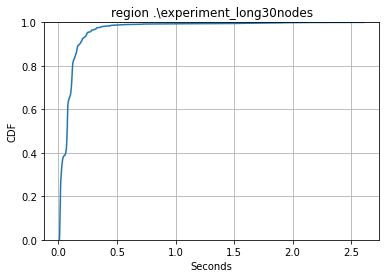

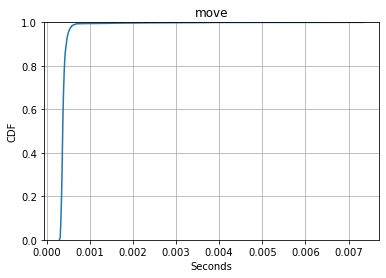

.\experiment_long30nodes
172.31.24.34_3000_1592021054.963175.json
0.10176274432919827


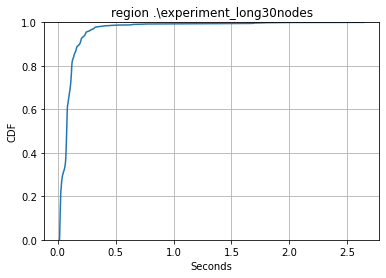

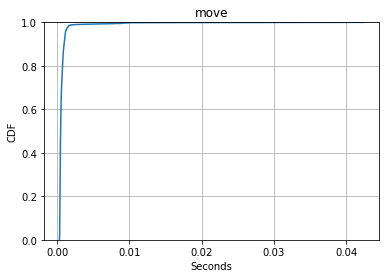

.\experiment_long30nodes
172.31.25.109_3000_1592021054.960836.json
0.10237542096004691


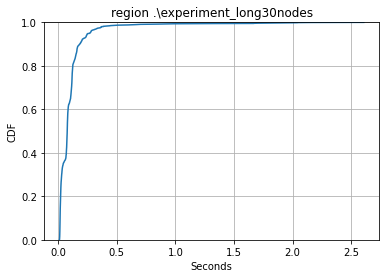

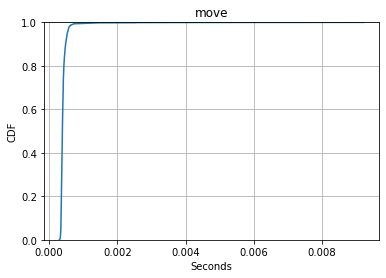

.\experiment_long30nodes
172.31.27.244_3000_1592021055.0006392.json
0.10240087421614974


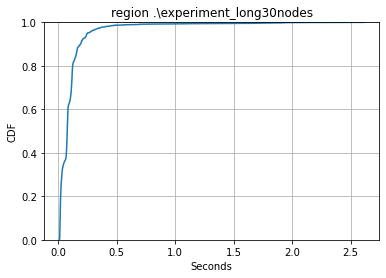

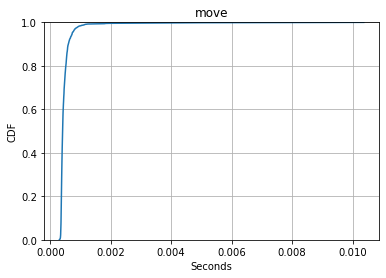

.\experiment_long30nodes
172.31.27.66_3000_1592021054.9504101.json
0.10250730904829265


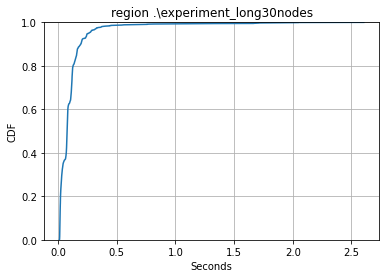

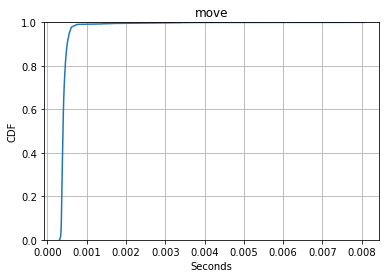

.\experiment_long30nodes
172.31.28.85_3000_1592021054.961585.json
0.11768771336713692


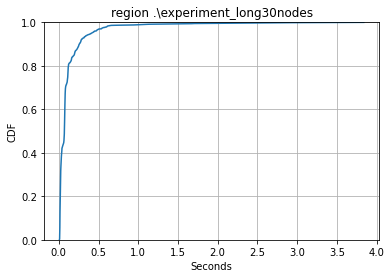

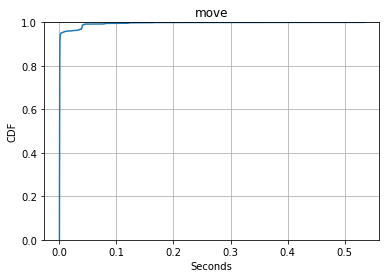

.\experiment_long30nodes
172.31.29.59_3000_1592021054.949334.json
0.10456808491204556


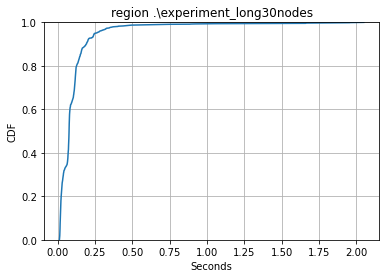

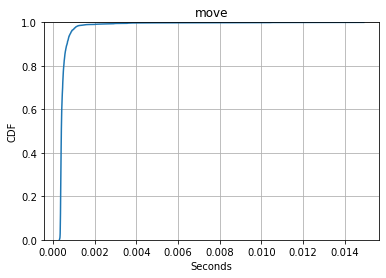

.\experiment_long30nodes
172.31.30.181_3000_1592021055.2245736.json
0.10093992107953781


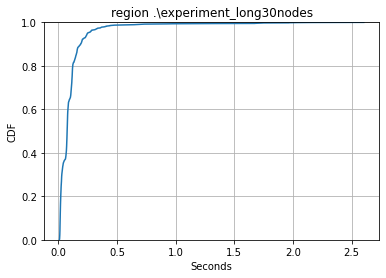

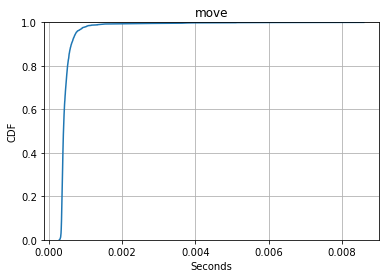

.\experiment_long30nodes
172.31.31.109_3000_1592021054.9773936.json
0.10278010831545703


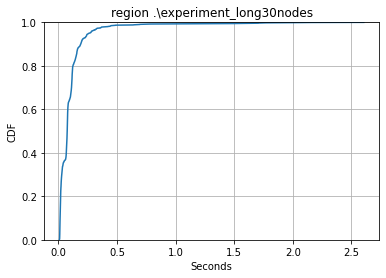

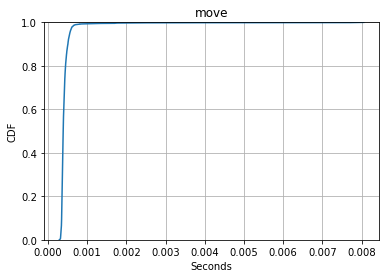

.\experiment_long30nodes
172.31.31.67_3000_1592021055.213818.json
0.10065725784947975


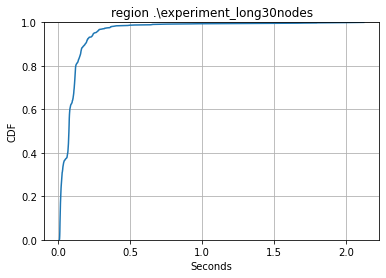

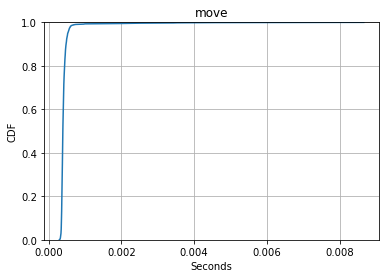

.\experiment_long60nodes
172.31.16.254_3000_1592021779.8097434.json
0.11579839060383458


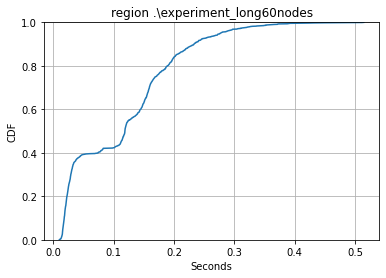

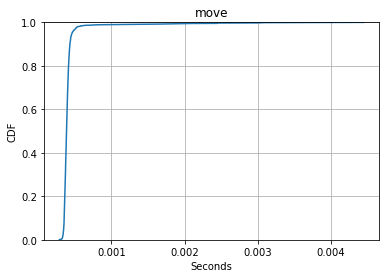

.\experiment_long60nodes
172.31.16.46_3000_1592021780.0192893.json
0.11797323386604976


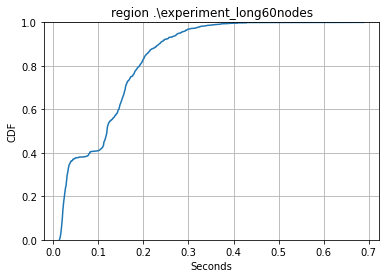

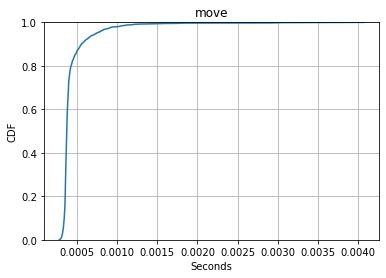

.\experiment_long60nodes
172.31.16.82_3000_1592021779.8181927.json
0.11393827761099236


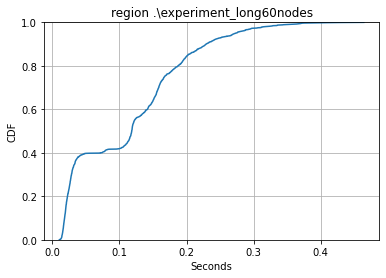

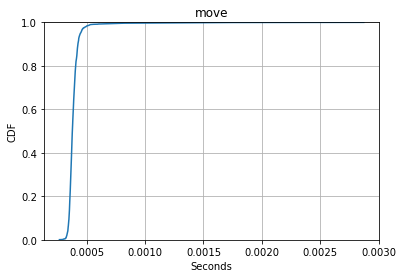

.\experiment_long60nodes
172.31.17.59_3000_1592021779.767872.json
0.11434553806879083


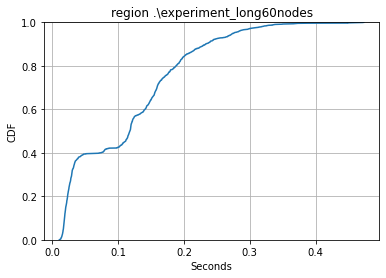

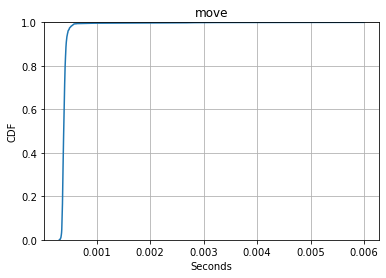

.\experiment_long60nodes
172.31.17.65_3000_1592021779.7892003.json
0.12159410415241537


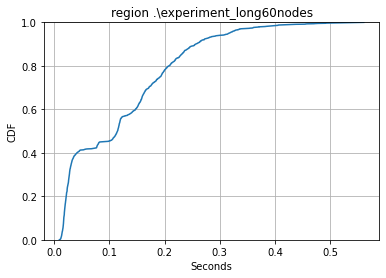

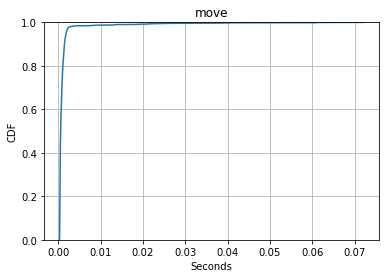

.\experiment_long60nodes
172.31.18.144_3000_1592021780.383543.json
0.12499892686647938


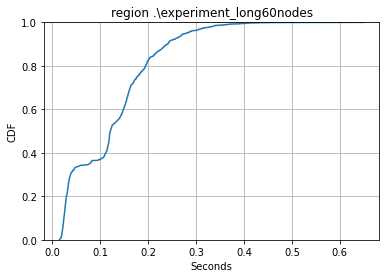

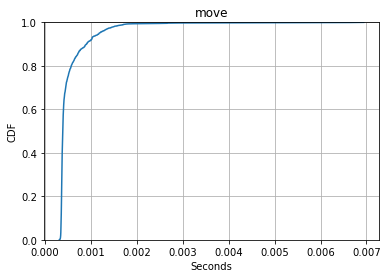

.\experiment_long60nodes
172.31.18.153_3000_1592021779.8915825.json
0.11535406939025408


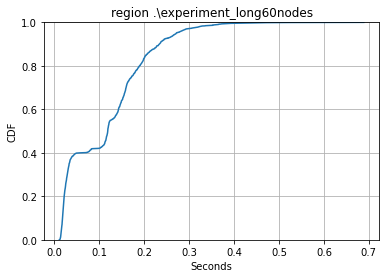

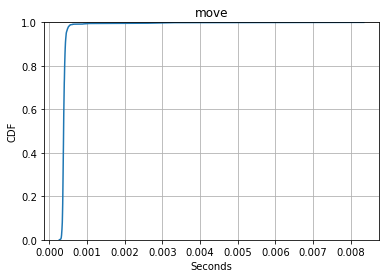

.\experiment_long60nodes
172.31.18.216_3000_1592021779.8550875.json
0.149000835377911


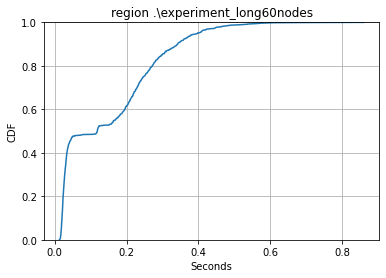

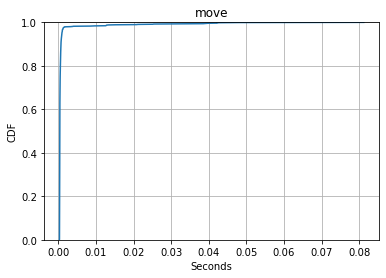

.\experiment_long60nodes
172.31.18.47_3000_1592021779.748973.json
0.15421578623735863


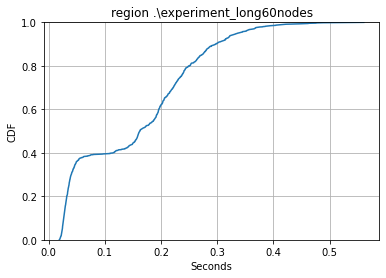

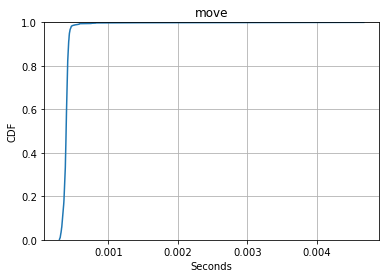

.\experiment_long60nodes
172.31.18.89_3000_1592021779.8513968.json
0.11579712805100126


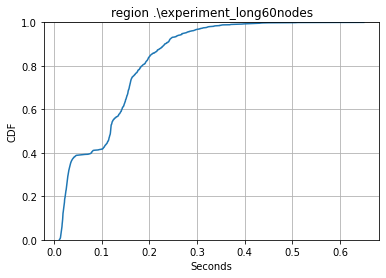

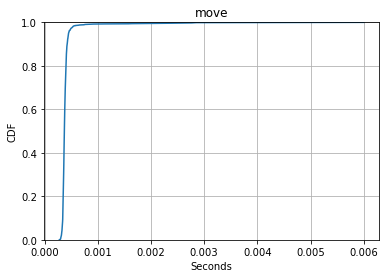

.\experiment_long60nodes
172.31.19.18_3000_1592021779.7043097.json
0.11425909698199435


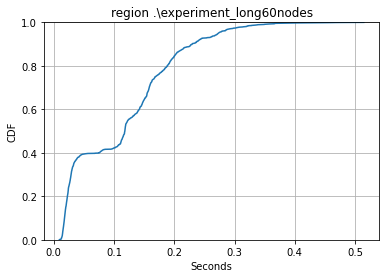

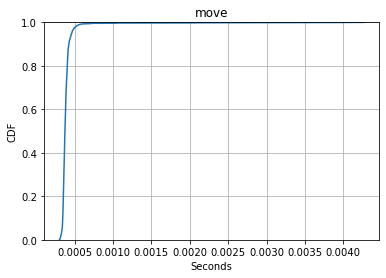

.\experiment_long60nodes
172.31.20.119_3000_1592021780.0267203.json
0.11599509830006641


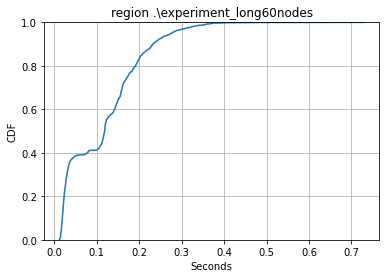

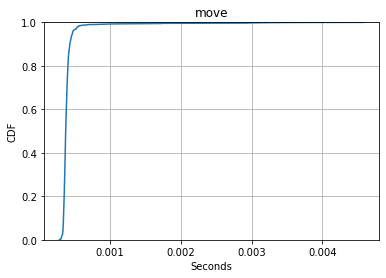

.\experiment_long60nodes
172.31.20.138_3000_1592021779.7958584.json
0.11562338954072379


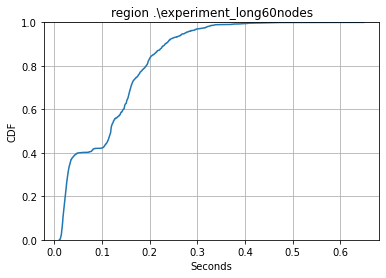

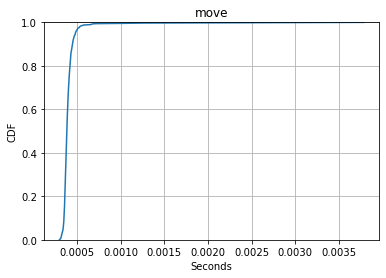

.\experiment_long60nodes
172.31.20.14_3000_1592021779.8806703.json
0.11475878820802729


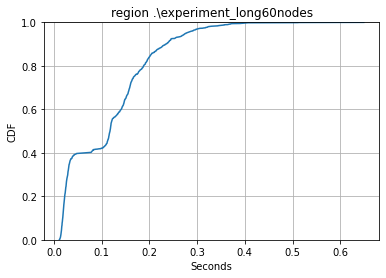

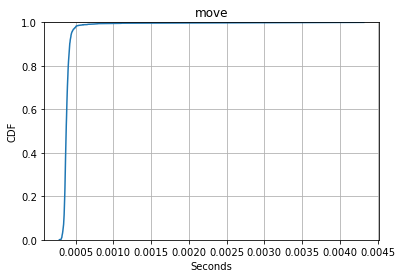

.\experiment_long60nodes
172.31.20.152_3000_1592021780.0250938.json
0.1150768124758623


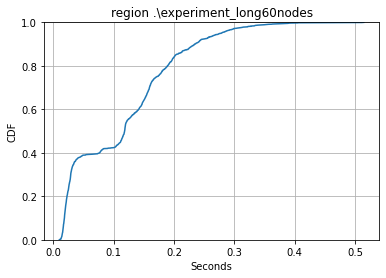

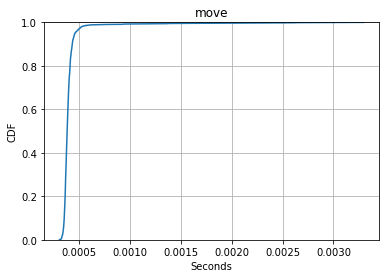

.\experiment_long60nodes
172.31.20.166_3000_1592021780.0941832.json
0.13332726300217723


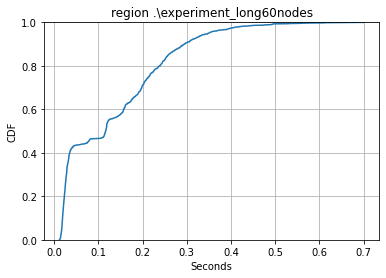

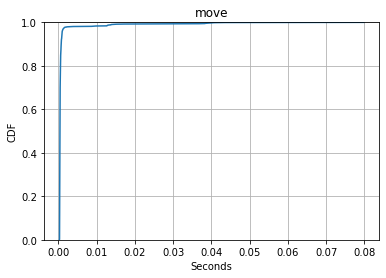

.\experiment_long60nodes
172.31.20.75_3000_1592021779.9906588.json
0.11507806985673043


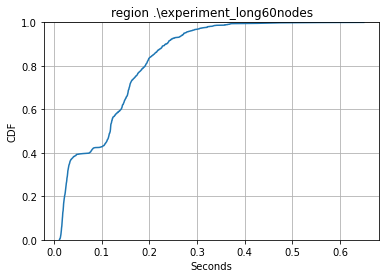

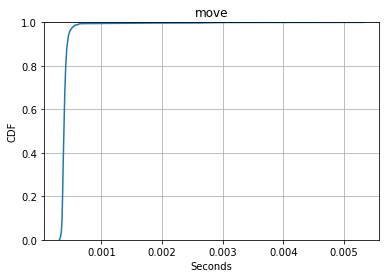

.\experiment_long60nodes
172.31.20.89_3000_1592021780.0168452.json
0.11473484504587796


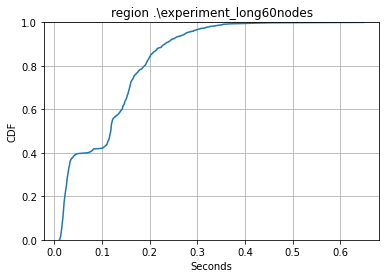

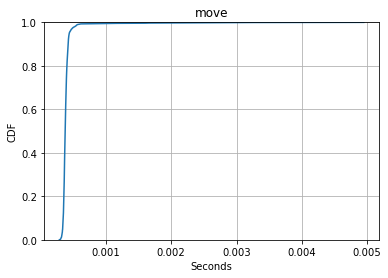

.\experiment_long60nodes
172.31.21.185_3000_1592021779.7892601.json
0.11472269260060147


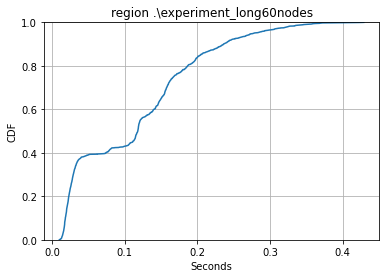

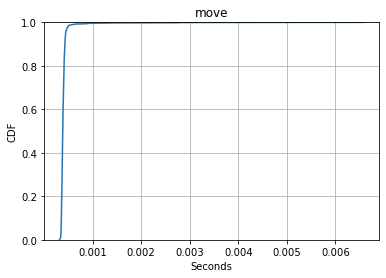

.\experiment_long60nodes
172.31.21.216_3000_1592021779.747905.json
0.11402243709442876


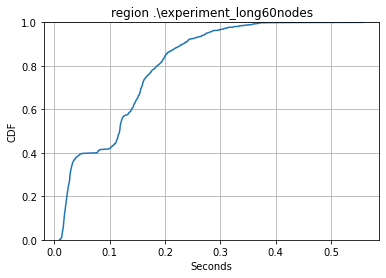

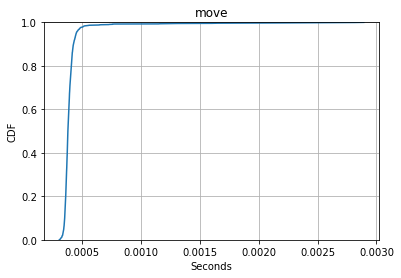

.\experiment_long60nodes
172.31.21.70_3000_1592021779.7391264.json
0.11394543514638988


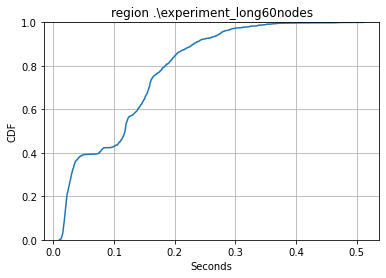

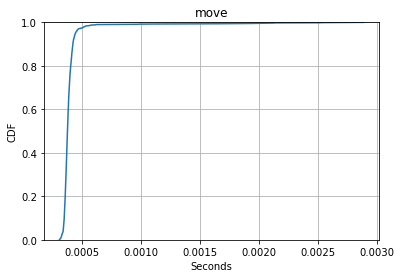

.\experiment_long60nodes
172.31.22.103_3000_1592021779.9761915.json
0.14835614642466255


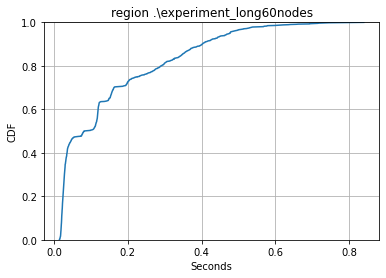

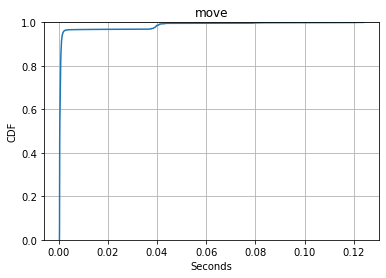

.\experiment_long60nodes
172.31.22.105_3000_1592021779.8102057.json
0.11124658791529637


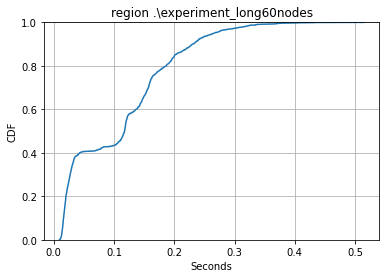

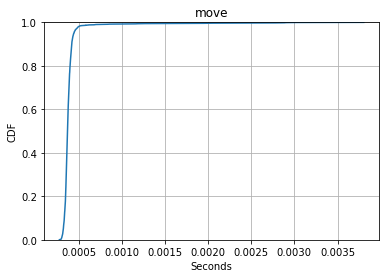

.\experiment_long60nodes
172.31.22.149_3000_1592021779.7531033.json
0.11754003178901021


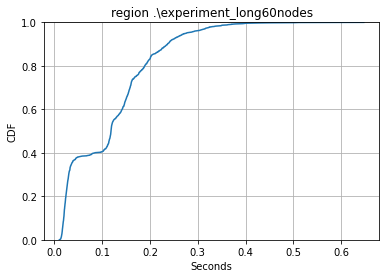

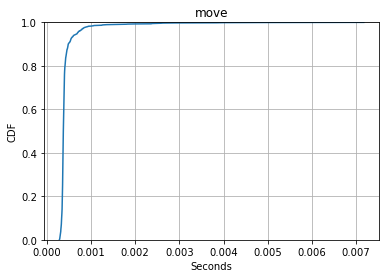

.\experiment_long60nodes
172.31.22.241_3000_1592021779.9618342.json
0.11741364829522918


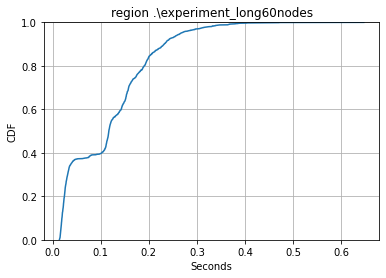

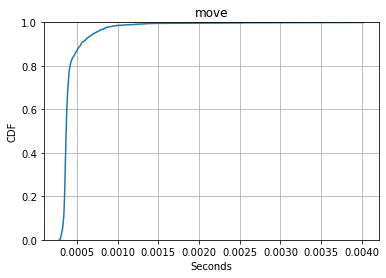

.\experiment_long60nodes
172.31.22.246_3000_1592021779.7310586.json
0.0897779970164219


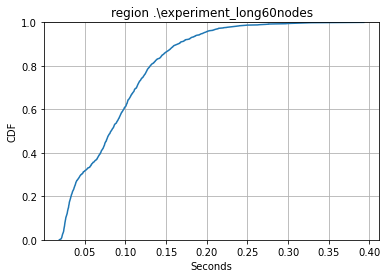

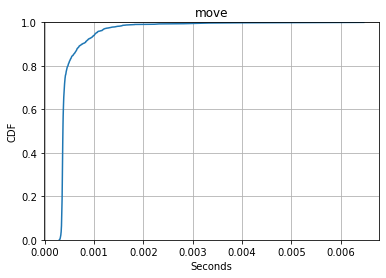

.\experiment_long60nodes
172.31.22.250_3000_1592021779.8066.json
0.1150922078541172


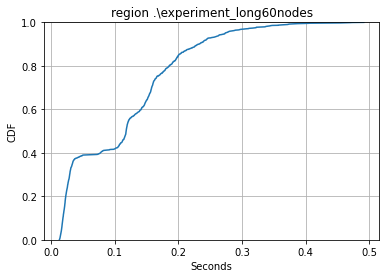

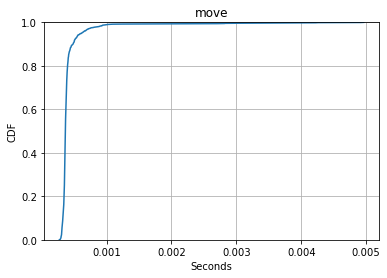

.\experiment_long60nodes
172.31.22.254_3000_1592021779.7192404.json
0.114755702247254


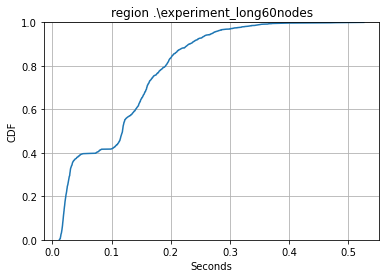

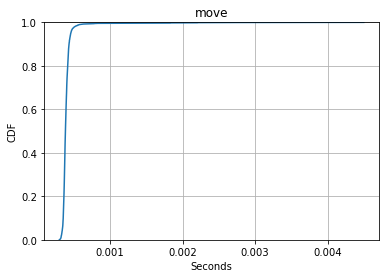

.\experiment_long60nodes
172.31.22.25_3000_1592021779.7546597.json
0.11503377818024013


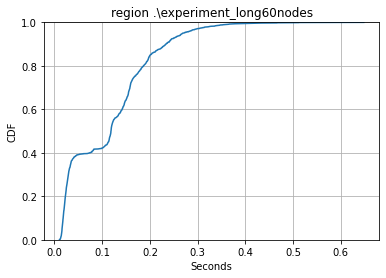

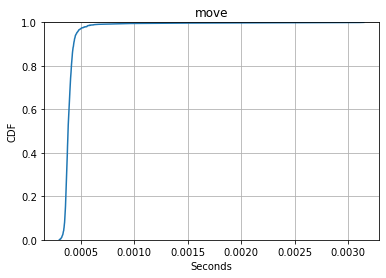

.\experiment_long60nodes
172.31.23.117_3000_1592021780.1434247.json
0.13380116030227307


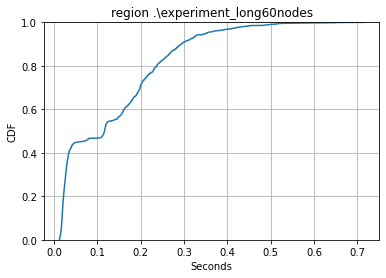

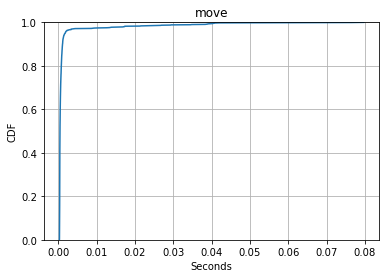

.\experiment_long60nodes
172.31.23.246_3000_1592021779.8280563.json
0.11619139489732258


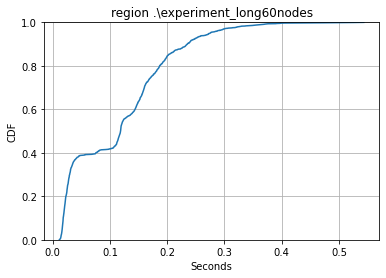

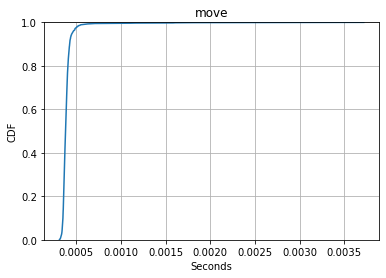

.\experiment_long60nodes
172.31.24.113_3000_1592021780.0094.json
0.11625743993906255


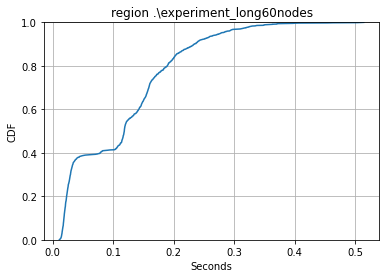

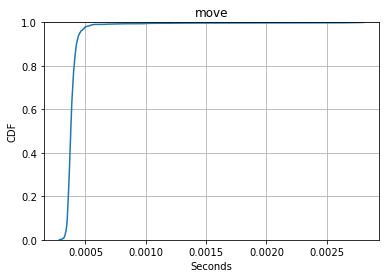

.\experiment_long60nodes
172.31.24.127_3000_1592021779.7187936.json
0.0876881279585055


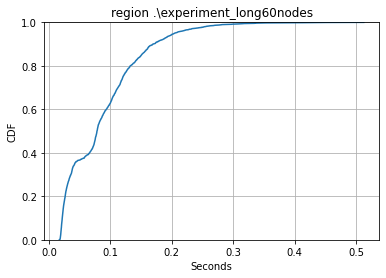

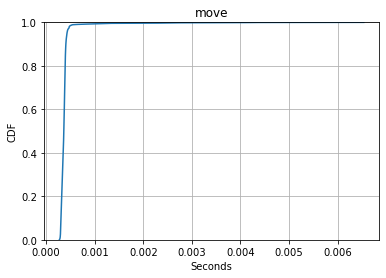

.\experiment_long60nodes
172.31.24.34_3000_1592021780.0100734.json
0.11639965958409496


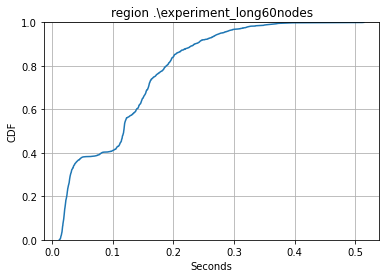

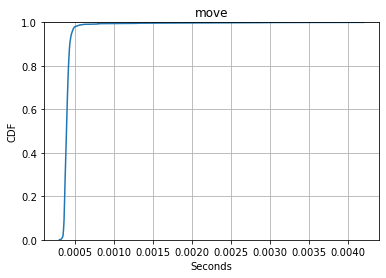

.\experiment_long60nodes
172.31.25.109_3000_1592021780.0044148.json
0.1154553747820257


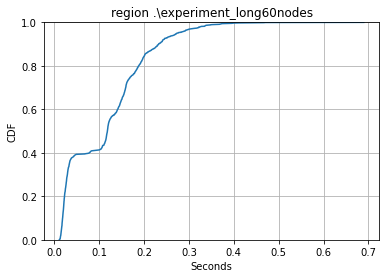

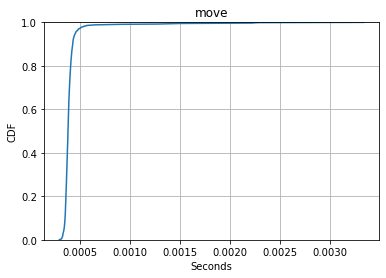

.\experiment_long60nodes
172.31.25.11_3000_1592021779.7339299.json
0.11597321539867148


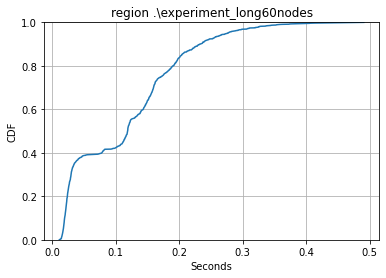

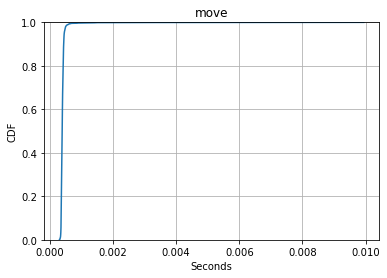

.\experiment_long60nodes
172.31.25.170_3000_1592021779.851237.json
0.11235355704239522


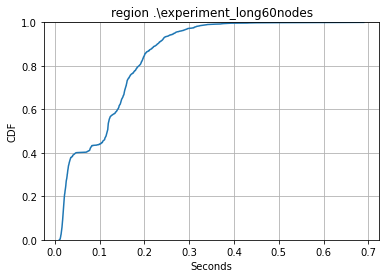

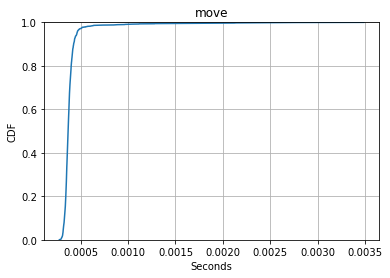

.\experiment_long60nodes
172.31.25.80_3000_1592021779.8278992.json
0.11372013261475539


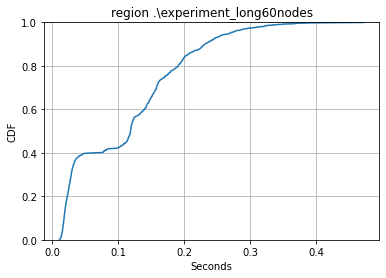

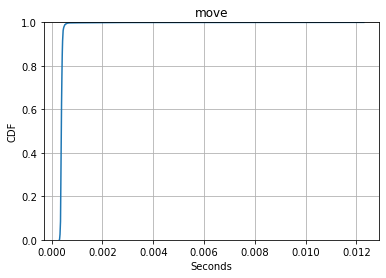

.\experiment_long60nodes
172.31.26.220_3000_1592021780.338357.json
0.14931734444692482


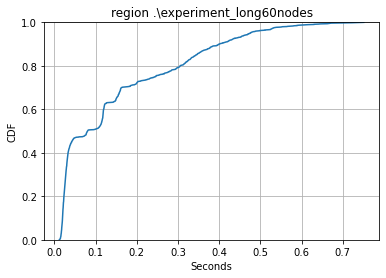

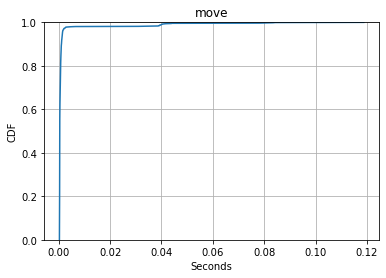

.\experiment_long60nodes
172.31.27.244_3000_1592021780.1710975.json
0.12205683656834224


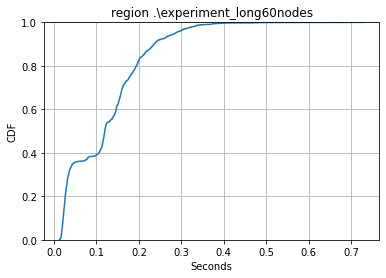

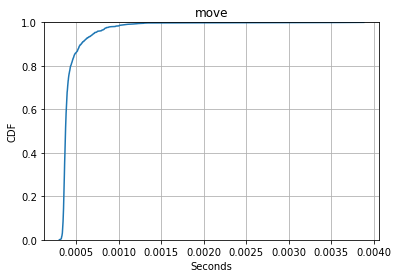

.\experiment_long60nodes
172.31.27.66_3000_1592021779.8352575.json
0.11453871602544657


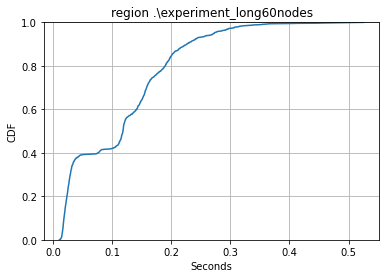

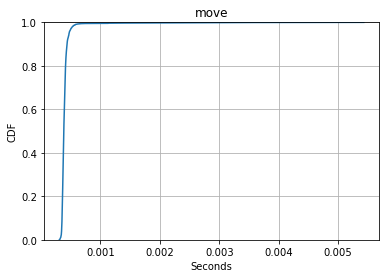

.\experiment_long60nodes
172.31.28.115_3000_1592021779.8358357.json
0.11492493017953229


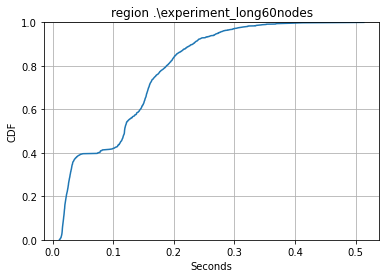

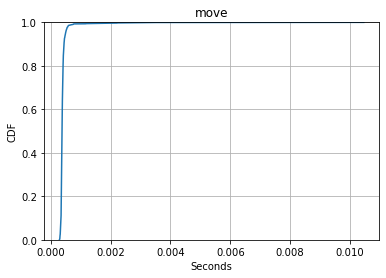

.\experiment_long60nodes
172.31.28.153_3000_1592021779.874205.json
0.1155425647230565


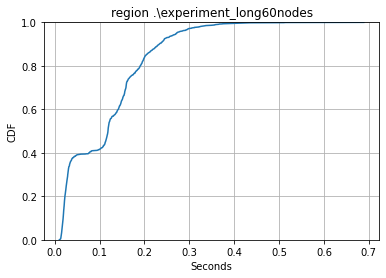

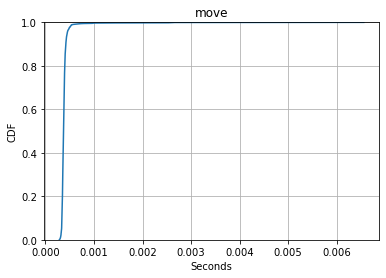

.\experiment_long60nodes
172.31.28.175_3000_1592021779.8905416.json
0.1123533505682805


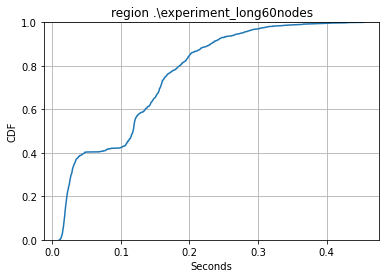

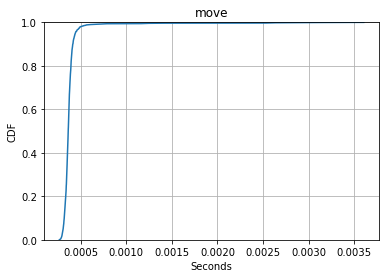

.\experiment_long60nodes
172.31.28.85_3000_1592021779.749312.json
0.20471276881183006


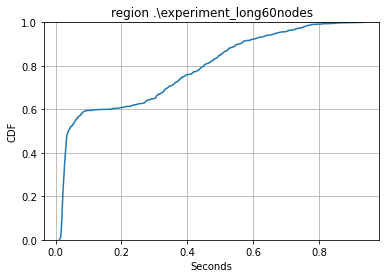

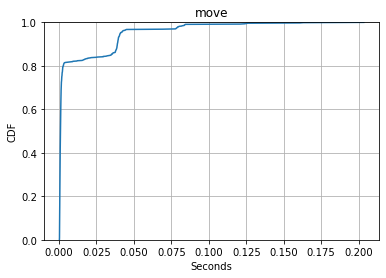

.\experiment_long60nodes
172.31.29.59_3000_1592021779.8094432.json
0.11601571558362843


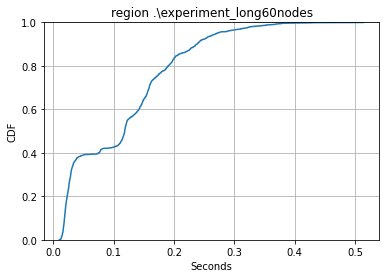

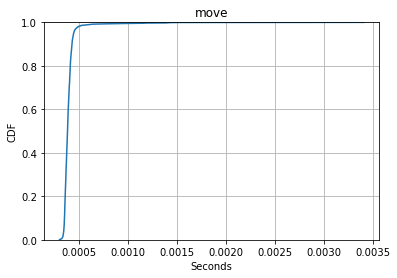

.\experiment_long60nodes
172.31.30.105_3000_1592021779.8109324.json
0.11256579814659765


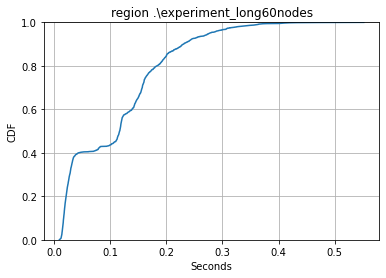

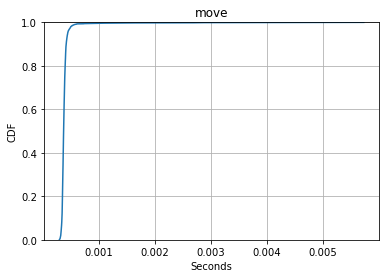

.\experiment_long60nodes
172.31.30.173_3000_1592021780.1081095.json
0.1158718346011254


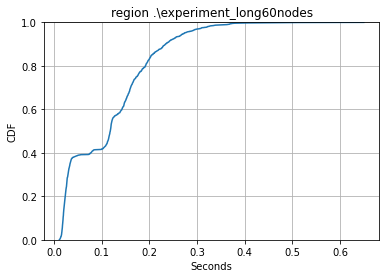

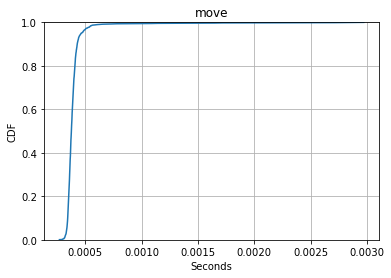

.\experiment_long60nodes
172.31.30.181_3000_1592021780.0013614.json
0.13218504399350114


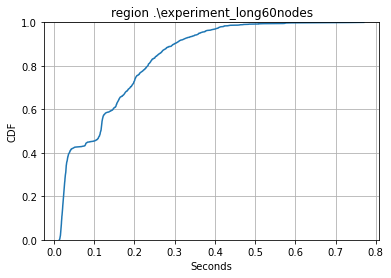

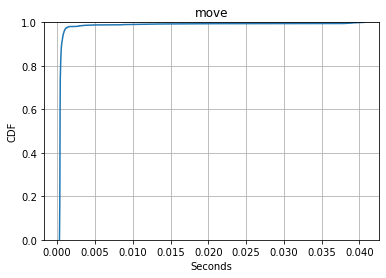

.\experiment_long60nodes
172.31.30.45_3000_1592021779.9025595.json
0.11396470677263383


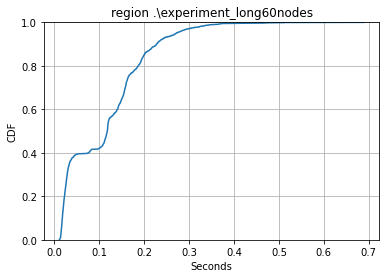

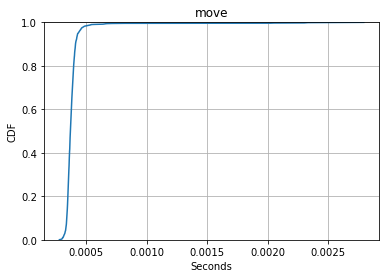

.\experiment_long60nodes
172.31.31.109_3000_1592021780.037716.json
0.11493967174336725


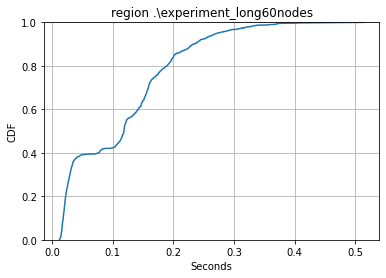

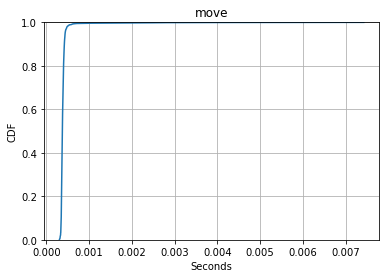

.\experiment_long60nodes
172.31.31.138_3000_1592021779.9893675.json
0.11262149365623493


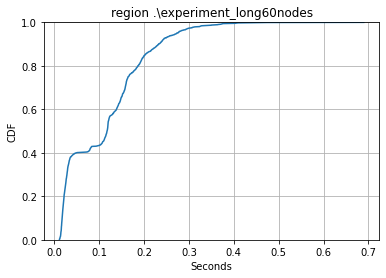

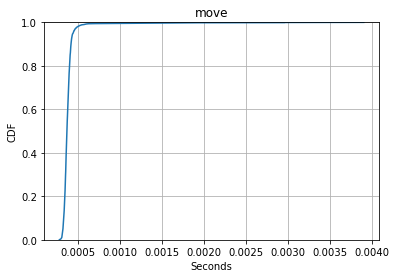

.\experiment_long60nodes
172.31.31.197_3000_1592021779.9133868.json
0.1139345491008394


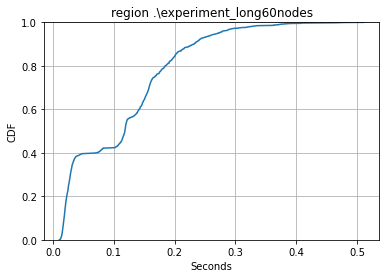

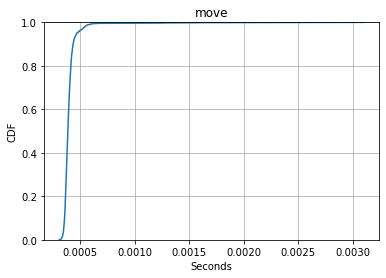

.\experiment_long60nodes
172.31.31.2_3000_1592021779.85186.json
0.11365877272590759


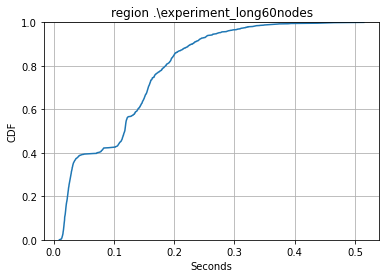

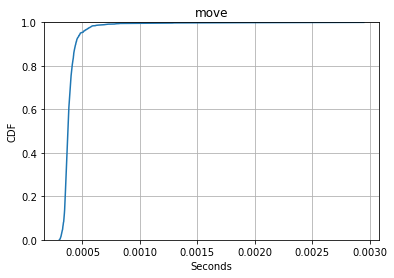

.\experiment_long60nodes
172.31.31.33_3000_1592021779.7970574.json
0.11391534217208794


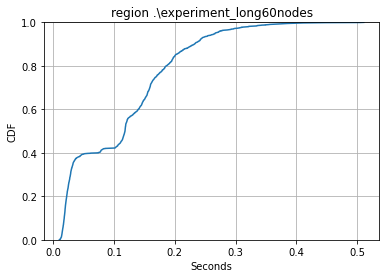

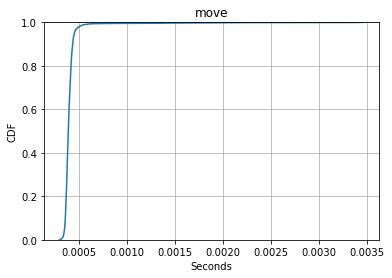

.\experiment_long60nodes
172.31.31.67_3000_1592021779.8474443.json
0.11460174098658546


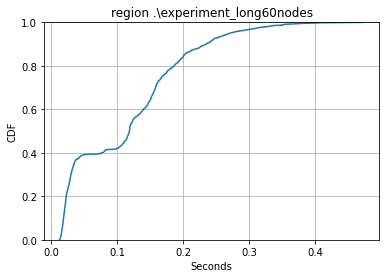

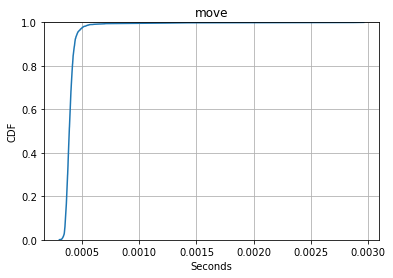

In [57]:
for experiment in experiments:
    log_files = [f for f in listdir(experiment) if isfile(join(experiment, f))]
    for log_file in log_files:
        print(experiment)
        print(log_file)
        file_path = experiment+"/"+log_file
        data = json.load(open(file_path, "rb"))
        region_data = data['region']
        move_data = data['move']
        
        print(np.average(region_data))
        
        cdf(region_data, "region "+experiment)
        cdf(move_data, "move")
        
    
    